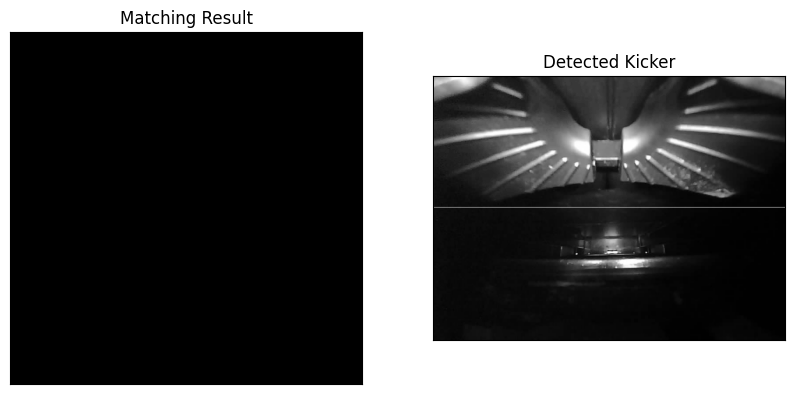

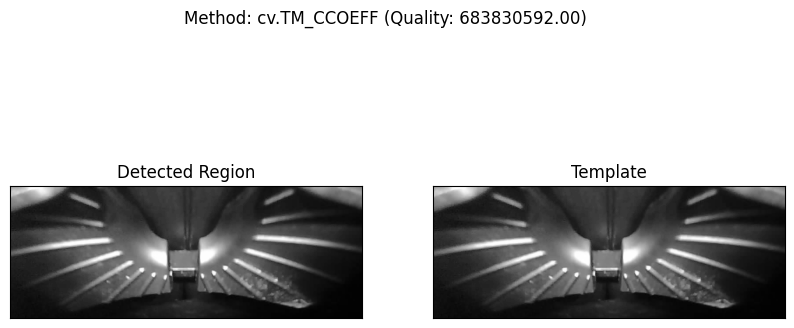

Method: cv.TM_CCOEFF, Kicker detected with match quality: 683830592.00


In [20]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def detect_kicker(image_path, template_path, threshold=0.7):
    # Load the input image and template
    img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    assert img is not None, "Image file could not be read, check path."
    
    img2 = img.copy()  # Keep a copy of the original image
    template = cv.imread(template_path, cv.IMREAD_GRAYSCALE)
    assert template is not None, "Template file could not be read, check path."
    
    # Template dimensions
    w, h = template.shape[::-1]
    
    # Only use the upper region of the image for matching
    height, width = img.shape
    upper_region = img[0:int(height/2), :]  # Upper half of the image
    
    # Define methods for template matching
    methods = ['cv.TM_CCOEFF']
    
    # Iterate through different template matching methods
    for meth in methods:
        img = img2.copy()  # Reset to the original image each time
        method = eval(meth)
        
        # Apply template matching in the upper region of the image
        res = cv.matchTemplate(upper_region, template, method)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        # Choose top-left corner based on method (SQDIFF takes min, others take max)
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
            match_quality = min_val
        else:
            top_left = max_loc
            match_quality = max_val
        
        # Check if match quality exceeds the threshold
        if match_quality >= threshold:
            # Draw rectangle around the detected kicker in the original upper region
            bottom_right = (top_left[0] + w, top_left[1] + h)
            cv.rectangle(img[0:int(height/2), :], top_left, bottom_right, 255, 2)
            
            # Prepare a visualization of the detection
            detected_region = upper_region[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
            plt.figure(figsize=(10, 5))
            
            plt.subplot(121)
            plt.imshow(res, cmap='gray')
            plt.title('Matching Result')
            plt.xticks([]), plt.yticks([])
            
            plt.subplot(122)
            plt.imshow(img, cmap='gray')
            plt.title('Detected Kicker')
            plt.xticks([]), plt.yticks([])
            
            # Visualize the detected region with the template overlay
            plt.figure(figsize=(10, 5))
            plt.subplot(121)
            plt.imshow(detected_region, cmap='gray')
            plt.title('Detected Region')
            plt.xticks([]), plt.yticks([])
            
            plt.subplot(122)
            plt.imshow(template, cmap='gray')
            plt.title('Template')
            plt.xticks([]), plt.yticks([])
            
            plt.suptitle(f'Method: {meth} (Quality: {match_quality:.2f})')
            plt.show()
            
            print(f"Method: {meth}, Kicker detected with match quality: {match_quality:.2f}")
        else:
            print(f"Method: {meth}, No kicker detected (match quality: {match_quality:.2f})")
        
# Test the function
image_path = 'image collection/CV Image Collection/03 Kicker Detection/800x600/Kicker at front position/Trial 1.jpg'
template_path = 'template image/template.jpg'

detect_kicker(image_path, template_path, threshold=0.7)

### Template Matching


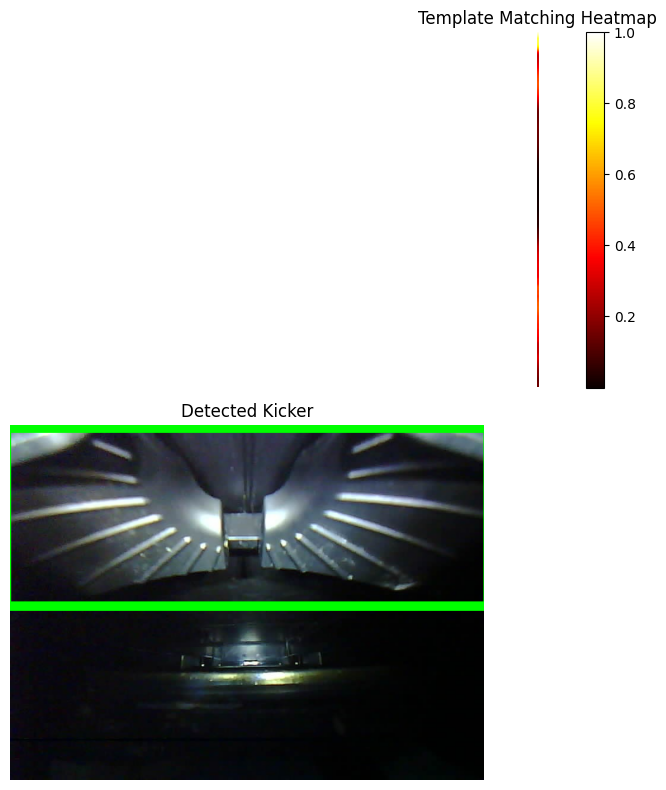

Kicker detected with template matching.


True

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function for detecting the kicker using template matching
def detect_kicker_with_template(image_path, template_path, threshold=0.7):
    # Step 1: Load the main image and the template image
    image = cv2.imread(image_path)
    template = cv2.imread(template_path, 0)  # Template is loaded in grayscale
    
    if image is None or template is None:
        print("Error: Image or template not found.")
        return None

    # Convert the input image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 2: Perform template matching
    result = cv2.matchTemplate(gray_image, template, cv2.TM_CCOEFF_NORMED)

    # Step 3: Normalize the result to enhance visibility of similarity
    cv2.normalize(result, result, 0, 1, cv2.NORM_MINMAX, -1)

    # Step 4: Find locations where the matching result exceeds the threshold
    loc = np.where(result >= threshold)

    # Visualize the matching result
    plt.figure(figsize=(10, 8))

    # Show template matching result heatmap
    plt.subplot(2, 1, 1)
    plt.imshow(result, cmap='hot')
    plt.colorbar()
    plt.title("Template Matching Heatmap")
    plt.axis("off")

    # Check if we found any matches above threshold
    detected = False
    w, h = template.shape[::-1]  # Get width and height of the template
    
    # If we have a match, draw rectangles around detected areas
    for pt in zip(*loc[::-1]):
        cv2.rectangle(image, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)
        detected = True

    # Show the result image with rectangles
    plt.subplot(2, 1, 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Detected Kicker" if detected else "Kicker Not Detected")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    # Print detection status
    if detected:
        print("Kicker detected with template matching.")
    else:
        print("Kicker not detected.")

    return detected

# Test the function with your image and template
image_path = 'image collection/CV Image Collection/03 Kicker Detection/800x600/Kicker at front position/Trial 3.jpg'
template_path = 'Reference_Imgs/reference_roi.jpg'  # Path to the template image

# Call the function with a threshold of 0.7
detect_kicker_with_template(image_path, template_path, threshold=0.7)

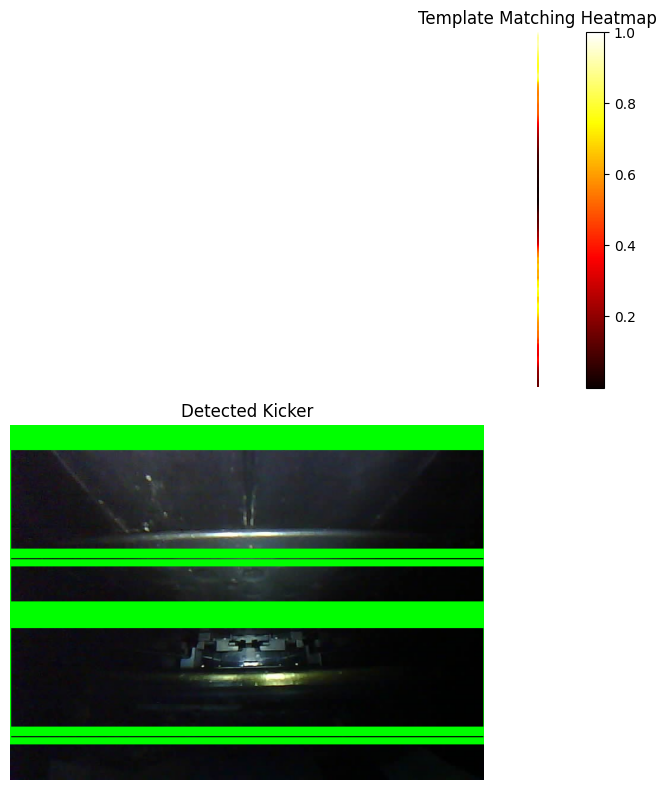

Kicker detected with template matching.


True

In [11]:
# Test the function with your image and template
image_path = 'image collection/CV Image Collection/03 Kicker Detection/800x600/Kicker at pos 100/Trial 2.jpg'
template_path = 'Reference_Imgs/reference_roi.jpg'  # Path to the template image

# Call the function with a threshold of 0.7
detect_kicker_with_template(image_path, template_path, threshold=0.7)

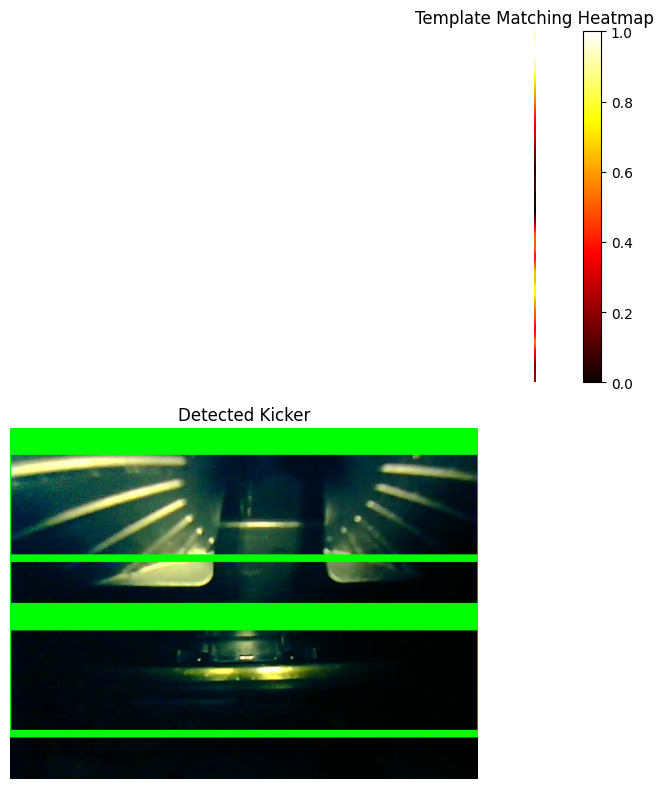

Kicker detected with template matching.


True

In [12]:
# Test the function with your image and template
image_path = 'image collection/CV Image Collection/03 Kicker Detection/800x600/Invalid Case/Kicker in reverse orientation/Trial 1.jpg'
template_path = 'Reference_Imgs/reference_roi.jpg'  # Path to the template image

# Call the function with a threshold of 0.7
detect_kicker_with_template(image_path, template_path, threshold=0.7)